In [4]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
data = pd.read_csv(r"C:\Users\HP\Downloads\covid_dataset (1).csv")
data

,Day,Lab Test,Confirmed case,Death Case
0,2020-April-04,434,9,2
1,2020-April-05,367,18,1
2,2020-April-06,468,35,3
3,2020-April-07,679,41,5
4,2020-April-08,981,54,3
...,...,...,...,...
621,2021-December-16,25203,257,3
622,2021-December-17,16310,191,2
623,2021-December-18,13991,122,4
624,2021-December-19,19332,211,1


In [6]:
data.dtypes

Day               object
Lab Test           int64
Confirmed case     int64
Death Case         int64
dtype: object

In [7]:
data.drop(['Lab Test', 'Confirmed case'], axis = 'columns', inplace = True)

In [8]:
data['Day'] = pd.to_datetime(data['Day'], infer_datetime_format = True) 

In [9]:
data.dtypes

Day           datetime64[ns]
Death Case             int64
dtype: object

In [10]:
covid_data = data.set_index(['Day'])

In [11]:
covid_data.head()

,Death Case
Day,
2020-04-04,2
2020-04-05,1
2020-04-06,3
2020-04-07,5
2020-04-08,3


<AxesSubplot:xlabel='Day'>

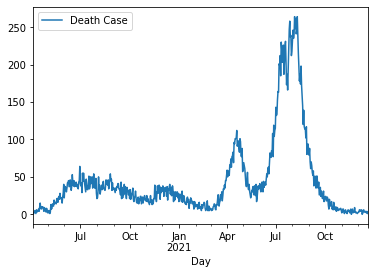

In [12]:
covid_data.plot()

In [13]:
covid_data.describe()

,Death Case
count,626.000000
mean,44.798722
std,54.528270
min,0.000000
25%,14.000000
50%,30.000000
75%,44.000000
max,264.000000


            Death Case
Day                   
2020-04-04         NaN
2020-04-05         NaN
2020-04-06         NaN
2020-04-07         NaN
2020-04-08         NaN
2020-04-09         NaN
2020-04-10         NaN
2020-04-11         NaN
2020-04-12         NaN
2020-04-13         NaN
2020-04-14         NaN
2020-04-15         NaN
2020-04-16         NaN
2020-04-17         NaN
2020-04-18         5.2


<AxesSubplot:xlabel='Day'>

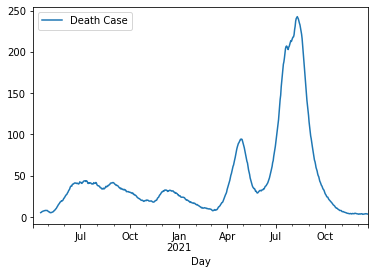

In [14]:
covid_datamean = covid_data.rolling(window = 15).mean()
print(covid_datamean.head(15))
covid_datamean.plot()

            Death Case
Day                   
2020-04-04         NaN
2020-04-05         NaN
2020-04-06         NaN
2020-04-07         NaN
2020-04-08         NaN
...                ...
2021-12-16    1.846490
2021-12-17    1.897367
2021-12-18    1.884776
2021-12-19    1.922300
2021-12-20    1.830951

[626 rows x 1 columns]


<AxesSubplot:xlabel='Day'>

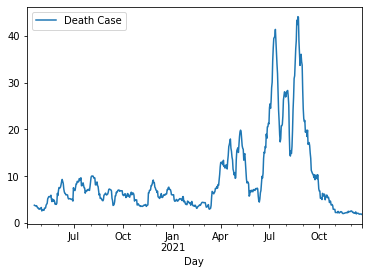

In [15]:
covid_datastd = covid_data.rolling(window = 15).std()
print(covid_datastd)
covid_datastd.plot()

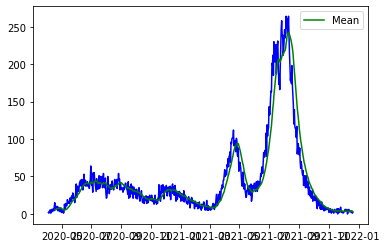

In [16]:
#graphical view
main_data = plt.plot(covid_data,color = 'blue')
mean = plt.plot(covid_datamean,color = 'green', label = 'Mean')
#STD = plt.plot(covid_datastd,color = 'red', label = 'STD')
plt.legend(loc = 'best')
plt.show()

In [21]:

from statsmodels.tsa.stattools import adfuller
def addfuller_testing(covid_data):
    datatest = adfuller(covid_data['Death Case'],autolag = 'AIC')
    output = pd.Series(datatest[0:4],index = ['Test Statistic','p-value','#Lags Used','number of observations'])
    for key,value in datatest[4].items():
        output['critical Value(%s)'%key]= value
    print(output)

In [22]:
addfuller_testing(covid_data)

Test Statistic             -2.980075
p-value                     0.036797
#Lags Used                 14.000000
number of observations    611.000000
critical Value(1%)         -3.441098
critical Value(5%)         -2.866282
critical Value(10%)        -2.569295
dtype: float64


C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


<AxesSubplot:xlabel='Day'>

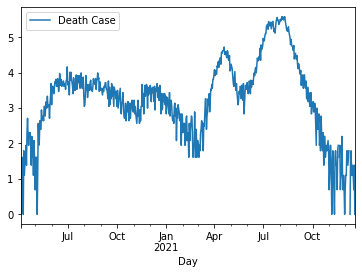

In [23]:
datalogscale = np.log(covid_data)
datalogscale.plot()

<AxesSubplot:xlabel='Day'>

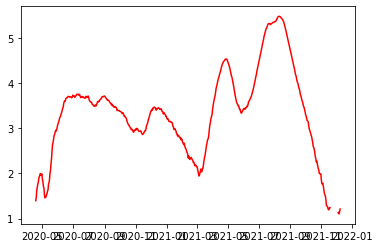

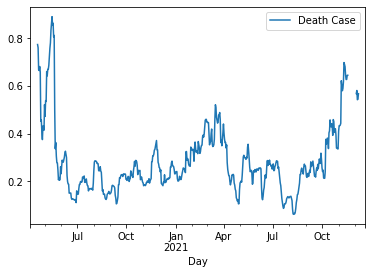

In [24]:
moving_average = datalogscale.rolling(window=15).mean()
moving_std = datalogscale.rolling(window=15).std()
#plt.plot(datalogscale)
plt.plot(moving_average, color = 'red')
##plt.plot(moving_std, color = 'black')
moving_std.plot()

In [25]:
logsminmovs =  datalogscale - moving_average
logsminmovs.dropna(inplace = True)
logsminmovs

,Death Case
Day,
2020-04-18,0.802159
2020-04-19,0.467327
2020-04-20,0.670497
2020-04-21,0.491895
2020-04-22,0.551046
...,...
2021-12-04,0.664520
2021-12-05,0.652365
2021-12-06,0.284208


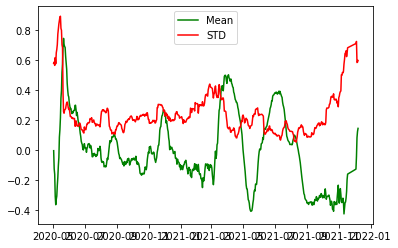

In [26]:
movA = logsminmovs.rolling(window=15).mean()
stdA = logsminmovs.rolling(window=15).std()
#main_data = plt.plot(data,color = 'blue')
mean = plt.plot(movA,color = 'green', label = 'Mean')
STD = plt.plot(stdA,color = 'red', label = 'STD')
plt.legend(loc = 'best')
plt.show()

In [27]:
#adfuller testing
addfuller_testing(logsminmovs)

Test Statistic             -4.543439
p-value                     0.000164
#Lags Used                  4.000000
number of observations    580.000000
critical Value(1%)         -3.441675
critical Value(5%)         -2.866536
critical Value(10%)        -2.569431
dtype: float64


<AxesSubplot:xlabel='Day'>

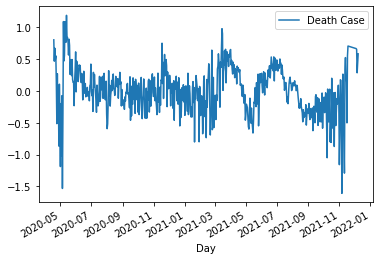

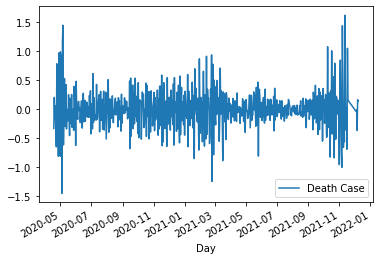

In [28]:
logsminmovs.plot()
shiftlogminmovs = logsminmovs - logsminmovs.shift()
shiftlogminmovs.plot()

In [29]:
shiftlogminmovs.dropna(inplace = True)

In [30]:
addfuller_testing(shiftlogminmovs)

Test Statistic           -9.003231e+00
p-value                   6.413244e-15
#Lags Used                1.500000e+01
number of observations    5.680000e+02
critical Value(1%)       -3.441915e+00
critical Value(5%)       -2.866642e+00
critical Value(10%)      -2.569487e+00
dtype: float64


In [31]:
shiftlogminmovs

,Death Case
Day,
2020-04-19,-0.334832
2020-04-20,0.203169
2020-04-21,-0.178601
2020-04-22,0.059151
2020-04-23,-0.413161
...,...
2021-12-04,-0.040128
2021-12-05,-0.012155
2021-12-06,-0.368157


In [32]:
from statsmodels.tsa.stattools import acf,pacf

In [33]:
Q_value = acf(shiftlogminmovs,nlags=10)
P_value = pacf(shiftlogminmovs,nlags=10, method = 'ols')

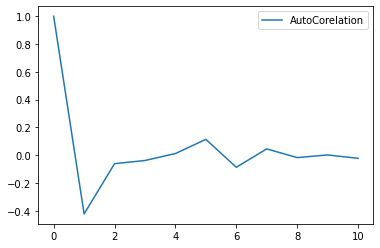

In [34]:
plt.plot(Q_value,label = 'AutoCorelation')
plt.legend(loc = 'best')

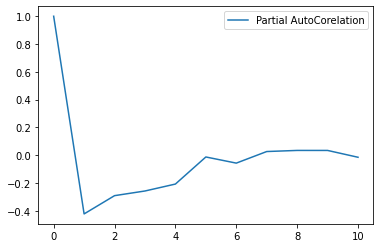

In [35]:
plt.plot(P_value,label = 'Partial AutoCorelation')
plt.legend(loc = 'best')

In [36]:
from statsmodels.tsa.arima_model import ARIMA

In [39]:
data_model = ARIMA(shiftlogminmovs, order = (1,0,1))

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


In [38]:
data_model_fit = data_model.fit()

NameError: name 'data_model' is not defined

Text(0.5, 1.0, 'RSS: 0.6101')

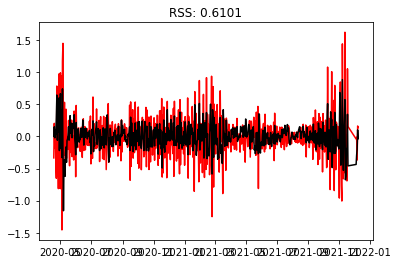

In [ ]:
plt.plot(shiftlogminmovs,color = 'red')
plt.plot(data_model_fit.fittedvalues,color = 'black')
plt.title('RSS: %.4f'% sum(data_model_fit.fittedvalues-shiftlogminmovs['Death Case'])**2)

In [ ]:
predictions = pd.Series(data_model_fit.fittedvalues,copy = True)
predictions.head()

Day
2020-04-19   -0.000034
2020-04-20    0.149402
2020-04-21   -0.022853
2020-04-22    0.095749
2020-04-23    0.028692
dtype: float64

<AxesSubplot:xlabel='Day'>

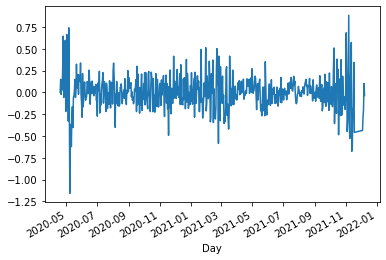

In [ ]:
predictions.plot()

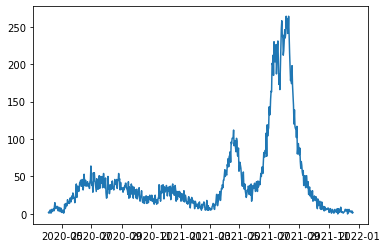

In [ ]:
plt.plot(covid_data)

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


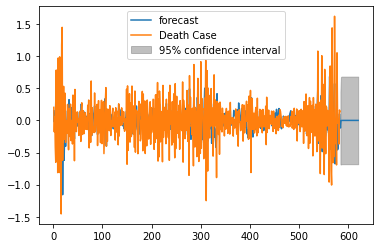

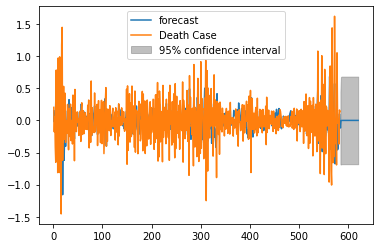

In [ ]:
data_model_fit.plot_predict(1,620)

In [ ]:
prediction = data_model_fit.forecast(steps = 30 )


In [ ]:
prediction[1]

array([0.28685216, 0.34888413, 0.34936774, 0.34937188, 0.34937192,
       0.34937192, 0.34937192, 0.34937192, 0.34937192, 0.34937192,
       0.34937192, 0.34937192, 0.34937192, 0.34937192, 0.34937192,
       0.34937192, 0.34937192, 0.34937192, 0.34937192, 0.34937192,
       0.34937192, 0.34937192, 0.34937192, 0.34937192, 0.34937192,
       0.34937192, 0.34937192, 0.34937192, 0.34937192, 0.34937192])